# Project: Finding factors to predict patients attendence to medical appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project I will investigate a dataset for medical appointments to predict which factors seems to determine whether patients attend to their appointments or not. The dataset contains data from people in Brazil. 

#### Question: Which factors determine the attendence of patients to their medical appoinments? 

Dependent variable: 'No-show'

Independent variables that are considered here: 'Age', 'Gender', 'Scholarship' and 'SMS_received'

##### Following correlations will be investigated here:
1. 'No_show' vs. 'Age' and 'Gender' 
2. 'No_show' vs. 'Scholarship'
3. 'No_show' vs. 'SMS_received'

The first step for performing a data analyses is to import all important packages for coding and ploting data. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

After importing the neccessary packages we read in the csv table and print out by default the first lines. Here we can get a first insight into the data we want to analyse.

In [3]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The shape function shows us the dimension of the dataframe. Here you can see that this dataframe has 110527 rows and 14 columns.

In [4]:
df.shape

(110527, 14)

The next cell shows us some interesting facts about the independent variables, e.g. that the mean of 'Age' is 37 years or that the mean of 'Scholarship' is only 9% or that nearly every fifth person has 'Hipertension'. On Average 32 percent received an SMS prior to their appointment.

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


This function returns the number of unique values for each column.

In [6]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

### Data Cleaning (e.g. check for duplicates, missing values and datatypes)

In this section we will clean our dataset, which means that we take a closer look at datatypes, duplicates and checking for missing values (NAN).
First I'm going to search for missing values (NAN) and after this look at the datatypes (and keep in mind that strings appear as objects).

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Now we check for duplicates.

In [8]:
sum(df.duplicated())

0

Now we can see that there are no duplicates nor missing values is our dataset.
Next we drop columns which we don't need for our analyses. We drop 'PatientId' since we still have the 'AppointmentID'. We also drop 'Neighbourhood' as well as medical conditions.

In [9]:
df.drop(['PatientId', 'ScheduledDay', 'Neighbourhood', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap'], axis = 1, inplace = True)
df.head()

,AppointmentID,Gender,AppointmentDay,Age,Scholarship,SMS_received,No-show
0,5642903,F,2016-04-29T00:00:00Z,62,0,0,No
1,5642503,M,2016-04-29T00:00:00Z,56,0,0,No
2,5642549,F,2016-04-29T00:00:00Z,62,0,0,No
3,5642828,F,2016-04-29T00:00:00Z,8,0,0,No
4,5642494,F,2016-04-29T00:00:00Z,56,0,0,No


Now I will get dummy variables for 'No-show' to make it easier to compare the data. For the dummy variables we use encoding 0 for False and 1 for True.

In [10]:
df[['no_show', 'show']] = pd.get_dummies(df['No-show'])
df.head()

,AppointmentID,Gender,AppointmentDay,Age,Scholarship,SMS_received,No-show,no_show,show
0,5642903,F,2016-04-29T00:00:00Z,62,0,0,No,1,0
1,5642503,M,2016-04-29T00:00:00Z,56,0,0,No,1,0
2,5642549,F,2016-04-29T00:00:00Z,62,0,0,No,1,0
3,5642828,F,2016-04-29T00:00:00Z,8,0,0,No,1,0
4,5642494,F,2016-04-29T00:00:00Z,56,0,0,No,1,0


To make sure we have matrices of full rank we have to drop one of the columns.

In [11]:
df = df.drop('No-show', axis=1)
df.head()

,AppointmentID,Gender,AppointmentDay,Age,Scholarship,SMS_received,no_show,show
0,5642903,F,2016-04-29T00:00:00Z,62,0,0,1,0
1,5642503,M,2016-04-29T00:00:00Z,56,0,0,1,0
2,5642549,F,2016-04-29T00:00:00Z,62,0,0,1,0
3,5642828,F,2016-04-29T00:00:00Z,8,0,0,1,0
4,5642494,F,2016-04-29T00:00:00Z,56,0,0,1,0


Now we can plot the data to visualize the outcome.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 8 columns):
AppointmentID     110527 non-null int64
Gender            110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Scholarship       110527 non-null int64
SMS_received      110527 non-null int64
no_show           110527 non-null uint8
show              110527 non-null uint8
dtypes: int64(4), object(2), uint8(2)
memory usage: 5.3+ MB


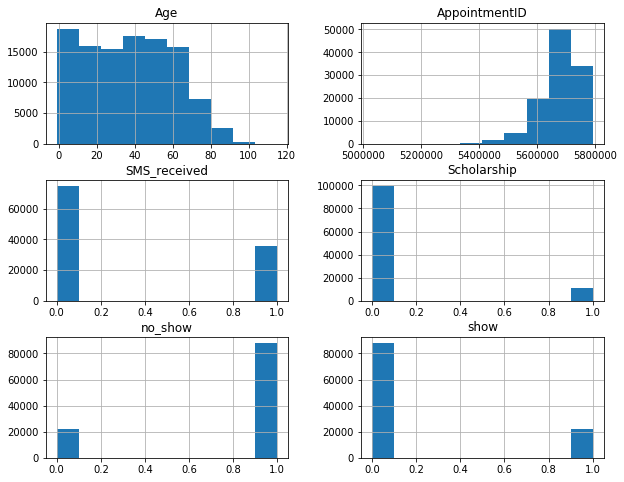

In [12]:
df.info()
df.hist(figsize=(10,8));

You can see that there are a lot of patients between 0 and 10 years old. The most patients are not enrolled in the Brazilian welfare program, which we already saw above in the describe function where the mean for 'scholarship' was only 9.8% for enrollment. Also only one third (32%) received SMS prior to their appointment.

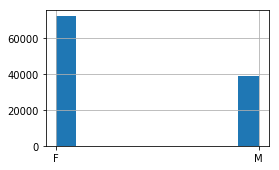

In [72]:
df['Gender'].hist(figsize = (4,2.5));

We plot Gender separatly and we see that we have far more female patients than male.

<a id='eda'></a>
## Exploratory Data Analysis

### Q1 How is 'Age' and 'Gender' correlated to 'No_show'?

Now we start to explore our data more closely. First we create masks for our dependent 'No-show' variable.

In [14]:
#no-show = No -> patient show up
#no-show = Yes -> patient did NOT show up

show = df.no_show == False
no_show = df.no_show == True

Now we look at 'Age' to find the mean.

In [15]:
df.Age[show].mean()

34.317666562121957

In [16]:
df.Age[no_show].mean()

37.790064393252315

Patients who did show up to their appointment are on average younger than patients who did NOT show up.

So we can also plot this for a more obviuous insight.

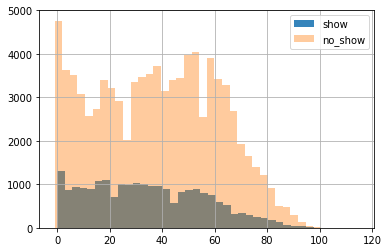

In [17]:
df.Age[show].hist(bins=40, alpha=0.9, label='show')
df.Age[no_show].hist(bins=40, alpha=0.4, label='no_show');
plt.legend();

The Histogram shows us that the most patient who made an appoinment didn't show up. And also that those who didn't show up are a lot of Babies and young kids under 10 years old, who won't show up alone for sure. Thats why we probably have further peaks in the age-groups around 20 and 30 to 40. Also there are peaks for patients who didn't show up around 50 and 60 years old. 

Now we take a closer look at 'Gender'.

In [18]:
df.groupby('Gender').show.mean()

Gender
F    0.203146
M    0.199679
Name: show, dtype: float64

In [19]:
df.groupby('Gender')['no_show'].mean()

Gender
F    0.796854
M    0.800321
Name: no_show, dtype: float64

It seems that there is not a big difference between male and female. But maybe there are more male or female patients in our dataset.

In [20]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

And we have been right. There are nearly much as double females than male patients in our dataset.

In [21]:
df.groupby('Gender')['show'].value_counts()

Gender  show
F       0       57246
        1       14594
M       0       30962
        1        7725
Name: show, dtype: int64

And with this data we can confirm that there were much more female patients which showed up to their appointment than male patients, but also in total more female than male patients.

We can also plot this data as below.

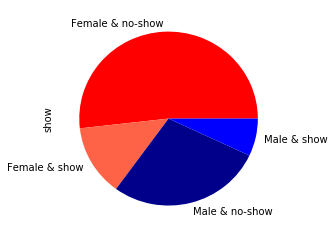

In [22]:
df.groupby('Gender')['show'].value_counts().plot.pie(
    figsize=(4, 4), 
    labels=['Female & no-show', 'Female & show', 'Male & no-show', 'Male & show'], 
    colors=['r', 'tomato', 'darkblue', 'blue']);


Now we want to know how 'Age' is correlated to 'Gender' and Attendance.

In [23]:
df.groupby(('Gender','show'))['Age'].mean()

Gender  show
F       0       39.590417
        1       36.162190
M       0       34.461372
        1       30.833010
Name: Age, dtype: float64

We see that male patients are about 6 years younger than female if they show up to their appointment and about 5 years younger if they didn't show up. 

### Q2 How is 'Scholarship' correlated to 'No_show'? 

Again first we look at the variable itself and find the mean.

In [24]:
df.Scholarship[show].mean()

0.11550696715802679

In [25]:
df.Scholarship[no_show].mean()

0.093903047342644652

About 11.6 percent of the patients who show up has a scholarship and a little less for the patients who did not show up with 9.4 percent has a scholarship. 

Now we take a closer look at the correlation of 'Scholarship' and 'Age'.

In [26]:
df.groupby('Scholarship')['Age'].mean()

Scholarship
0    37.794223
1    30.616242
Name: Age, dtype: float64

And the mean tells us that mostly younger patients has a scholarship.

So let's see how this result correlates with 'Gender' and Attendance.

In [27]:
df.groupby(('Scholarship','Gender', 'show'))['Age'].mean()

Scholarship  Gender  show
0            F       0       40.409612
                     1       36.872598
             M       0       35.213383
                     1       31.642079
1            F       0       33.459019
                     1       31.949668
             M       0       20.054688
                     1       18.400424
Name: Age, dtype: float64

So here you can see that the patients who have a scholarship AND shows up to their appointment are mostly male and on average 18 years old or female and on average 32 years old. Because we saw above that there are a lot of patients under 10 years old I assume that these patients who shows up to their appointments are mostly young mothers with male kids or babies.
Patients who do not have a scholarship but show up to their appointment are male and on average 32 years old or female and on average 37 years old. 
For patients without a scholarship this is the same direction, so they are older if they did not show up.

In [55]:
df.groupby('Scholarship')['show'].value_counts()

Scholarship  show
0            0       79925
             1       19741
1            0        8283
             1        2578
Name: show, dtype: int64

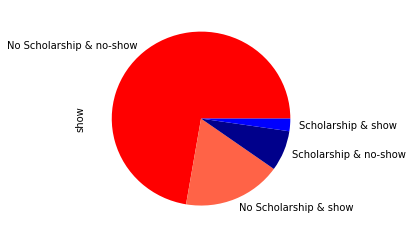

In [56]:
df.groupby('Scholarship')['show'].value_counts().plot.pie(
figsize=(4, 4), 
labels=['No Scholarship & no-show', 'No Scholarship & show', 'Scholarship & no-show', 'Scholarship & show'], 
colors=['r', 'tomato', 'darkblue', 'blue']);

### Q3 How is 'SMS_received' correlated to 'No_show'?

We take a look at the variable itself. This time we want to have the accurate number of patients who received SMS prior to their appointment and those who doesn't.

In [29]:
df.SMS_received.value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

Only 35482 received a SMS, but 75045 didn't received a message. So let's take a look at the mean.

In [30]:
df.SMS_received[show].mean()

0.43837089475334917

In [31]:
df.SMS_received[no_show].mean()

0.29133411935425357

As we can see is receiving SMS prior to the appointment important for attendance to the medical appointment. Nearly 44 procent received SMS and attended. About nearly one third who received an SMS prior did NOT show up.

Just check shortly if there is a correlation between 'Age' and 'SMS_received'.

In [32]:
df.groupby('SMS_received')['Age'].mean()

SMS_received
0    36.887961
1    37.513810
Name: Age, dtype: float64

Patients who received a SMS were about 38 years old. Patients without receiving SMS had been about 37 years old. So there is no big difference in 'Age' at all.

Now let's see if there is a correlation between 'Gender' and 'SMS_received'.

In [33]:
df.groupby('SMS_received')['Gender'].value_counts()

SMS_received  Gender
0             F         47638
              M         27407
1             F         24202
              M         11280
Name: Gender, dtype: int64

Here we see, that more female received an SMS and at the same time more female did NOT received an SMS. So this is due to the point that there are anyway more females in this dataset. So there is not a big output here.

So finally we check the correlation between 'Scholarship' and 'SMS_received'.

In [34]:
df.groupby('SMS_received')['Scholarship'].mean()

SMS_received
0    0.098021
1    0.098782
Name: Scholarship, dtype: float64

That is interesting, because there is no diffence at all between having a scholarship and receiving an SMS.

So since there is no interesting correlation between the other independent variables and 'SMS_received', we plot the only interesting correlation for Attendance and 'SMS_received'.

In [57]:
df.groupby('SMS_received')['show'].value_counts()

SMS_received  show
0             0       62510
              1       12535
1             0       25698
              1        9784
Name: show, dtype: int64

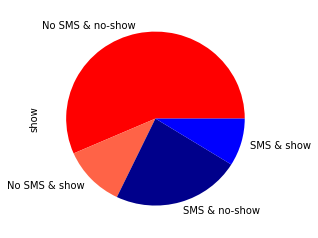

In [58]:
df.groupby('SMS_received')['show'].value_counts().plot.pie(
figsize=(4, 4), 
labels=['No SMS & no-show', 'No SMS & show', 'SMS & no-show', 'SMS & show'], 
colors=['r', 'tomato', 'darkblue', 'blue']);


Most patients didn't received SMS and also did not show up to their appointment.

<a id='conclusions'></a>
## Conclusions

In this notebook I investigated a dataset for medical appointments of Brazilian patients to determine whether they attend to their appointments or not. I analysed four independent variables (Age, Gender, Scholarship and SMS received) to see if there will be some sort of correlation among them and/or to my dependend variable (show up). Since there was no statistical test run it will set this interpretation to limitations.

But none the less I can summarize my findings.
First we have more female patients in this dataset than male patients. The male patients are mostly younger than the female patients. There are a lot of very young patients like babies and children under the age of 10 years old. Also there were more patients who did not attend to their appointment at all. There is just a small number of patients who are enrolled in Brazilian wellfare (Scholarship). We saw that patient who have a scholarship and attend their appointment have been female patients with a mean age of 32 years or male patients with a mean age of 18 years. The mean for scholarship shows us further that there are more younger patients with a scholarship. Besides the fact that most patients did not receive a SMS prior to their appointment, the most interesting finding was that if the patients did receive a SMS prior they were more likely to show up with nearly 44 percent. 

All these findings are just a starting point for more statistical tests. It would be interesting if there are more female patients who are doing their appointments for their own concerns or for their children, because we can assume that kids under the age of 10 years won't attend to an appointment on their own. It would also be interesting to know whether an Scholarship or receiving a SMS prior to the appointment would be helpful to have more patients show up to their appointments.

In [74]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

Research:
(1) https://matplotlib.org/users/colormaps.html
(2) https://matplotlib.org/users/colors.html
(3) https://pandas.pydata.org/pandas-docs/
(4) https://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-barplot